In [1]:
! pip install networkx

import matplotlib.pyplot as plt
import networkx as nx

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 22.7 MB/s eta 0:00:00


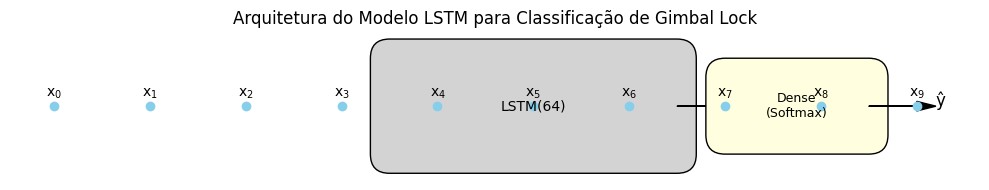

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis("off")

# Entradas
for i in range(10):
    ax.plot(i, 1, "o", color="skyblue")
    ax.text(i, 1.1, f"x$_{{{i}}}$", ha="center")

# LSTM bloco
ax.add_patch(mpatches.FancyBboxPatch((3.5, 0.5), 3, 1, boxstyle="round,pad=0.2", fc="lightgray"))
ax.text(5, 1, "LSTM(64)", ha="center", va="center", fontsize=10)

# Densa
ax.arrow(6.5, 1, 0.5, 0, head_width=0.1, head_length=0.2, fc="k", ec="k")
ax.add_patch(mpatches.FancyBboxPatch((7, 0.7), 1.5, 0.6, boxstyle="round,pad=0.2", fc="lightyellow"))
ax.text(7.75, 1, "Dense\n(Softmax)", ha="center", va="center", fontsize=9)

# Saída
ax.arrow(8.5, 1, 0.5, 0, head_width=0.1, head_length=0.2, fc="k", ec="k")
ax.text(9.2, 1, "ŷ", fontsize=12)

ax.set_title("Arquitetura do Modelo LSTM para Classificação de Gimbal Lock", fontsize=12)
plt.tight_layout()
plt.show()

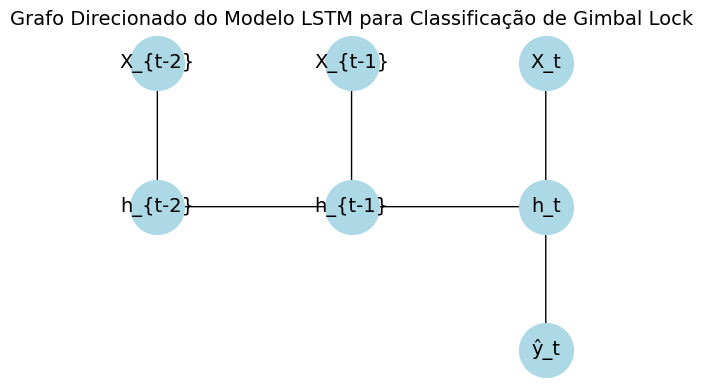

In [3]:
# Criação do grafo direcionado
G = nx.DiGraph()

# Nós de entrada (X_t)
inputs = ['X_{t-2}', 'X_{t-1}', 'X_t']
hidden = ['h_{t-2}', 'h_{t-1}', 'h_t']
output = ['ŷ_t']

# Adiciona os nós
G.add_nodes_from(inputs + hidden + output)

# Conexões entrada -> hidden
for x, h in zip(inputs, hidden):
    G.add_edge(x, h)

# Conexões hidden -> hidden (recorrência)
for i in range(len(hidden)-1):
    G.add_edge(hidden[i], hidden[i+1])

# Conexão última hidden -> saída
G.add_edge(hidden[-1], output[0])

# Posições customizadas para visualização
pos = {
    'X_{t-2}': (-2, 1), 'X_{t-1}': (0, 1), 'X_t': (2, 1),
    'h_{t-2}': (-2, 0), 'h_{t-1}': (0, 0), 'h_t': (2, 0),
    'ŷ_t': (2, -1)
}

# Desenho
plt.figure(figsize=(5, 4))
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=14)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
plt.title("Grafo Direcionado do Modelo LSTM para Classificação de Gimbal Lock", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

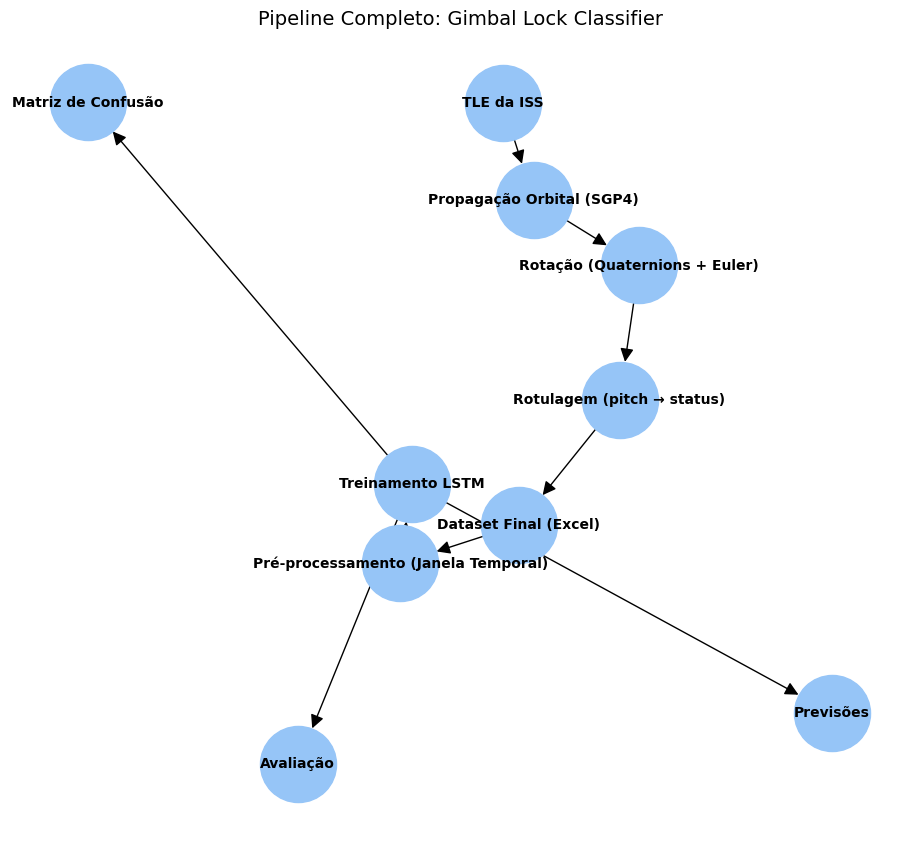

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Criando o grafo
G = nx.DiGraph()

# Etapas do pipeline
G.add_edge("TLE da ISS", "Propagação Orbital (SGP4)")
G.add_edge("Propagação Orbital (SGP4)", "Rotação (Quaternions + Euler)")
G.add_edge("Rotação (Quaternions + Euler)", "Rotulagem (pitch → status)")
G.add_edge("Rotulagem (pitch → status)", "Dataset Final (Excel)")

# Modelagem de IA
G.add_edge("Dataset Final (Excel)", "Pré-processamento (Janela Temporal)")
G.add_edge("Pré-processamento (Janela Temporal)", "Treinamento LSTM")
G.add_edge("Treinamento LSTM", "Avaliação")
G.add_edge("Treinamento LSTM", "Matriz de Confusão")
G.add_edge("Treinamento LSTM", "Previsões")

# Visualização
plt.figure(figsize=(9, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="#96c5f7", node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
plt.title("Pipeline Completo: Gimbal Lock Classifier", fontsize=14)
plt.show()

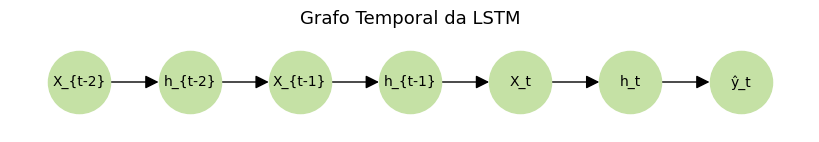

In [5]:
G = nx.DiGraph()

# Sequência temporal
G.add_edge("X_{t-2}", "h_{t-2}")
G.add_edge("h_{t-2}", "X_{t-1}")
G.add_edge("X_{t-1}", "h_{t-1}")
G.add_edge("h_{t-1}", "X_t")
G.add_edge("X_t", "h_t")
G.add_edge("h_t", "ŷ_t")

# Visualização
plt.figure(figsize=(8, 1))
pos = {
    "X_{t-2}": (0, 0), "h_{t-2}": (1, 0),
    "X_{t-1}": (2, 0), "h_{t-1}": (3, 0),
    "X_t":     (4, 0), "h_t":     (5, 0),
    "ŷ_t":     (6, 0)
}
nx.draw(G, pos, with_labels=True, node_color="#c5e1a5", node_size=2000, font_size=10, arrows=True, arrowsize=20)
plt.title("Grafo Temporal da LSTM", fontsize=13)
plt.axis("off")
plt.show()